# quick analysis

In [76]:
import numpy as np
import pandas as pd

f = pd.read_csv('0.1E+7.txt', names=['time', 'sma', 'theo', 'euler'])

data = f['time'][:]


# Analytically: GCR = const.

In [75]:
import numpy as np

PGCRdpmkg_10Be = 10.89 #dpmkg1
PGCR_10Be = PGCRdpmkg_10Be/60000 # atoms/g/s
PGCRdpmkg_26Al = 14.75 #dpmkg1
PGCR_26Al = PGCRdpmkg_26Al/60000 # atoms/g/s

yr = 3.15581450e7
Behl = 1.387e6
λBe = np.log(2.0) / (Behl * yr)
Alhl = 0.717e6
λAl = np.log(2.0) / (Alhl  * yr)

au = 1.4959787066e11

######## in cgs ############
rho = 2.5 #g cm3
#rhokgm3 = rho * 1000
d = 350 # in mikrometer
d = d * 1e-4
k = 3.5 * d * rho

print(r'Saturation of $^{10}$ Be ($10^9$ ats/kg) at ' + str((PGCR_10Be / λBe)*1e-9))
print(r'Saturation of $^{10}$ Al ($10^9$ ats/kg) at ' + str((PGCR_26Al / λAl)*1e-9))

Saturation of $^{10}$ Be ($10^9$ ats/kg) at 11.461437663144967
Saturation of $^{10}$ Al ($10^9$ ats/kg) at 8.02501645980718


Text(0, 0.5, '$10^9$/g of $^{10}$Be')

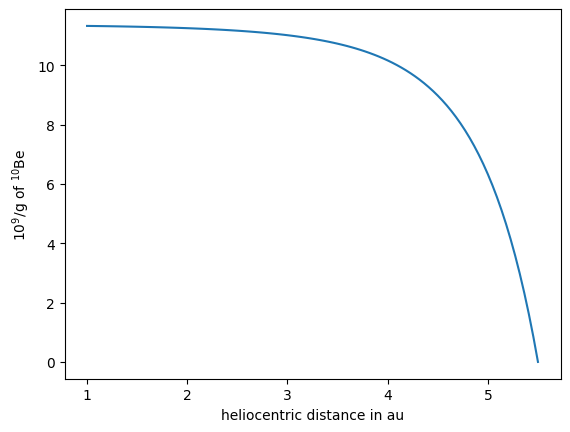

In [74]:
# N(t) = P/const. * (1 - e^-const.*t )
# t_Pr = 3.5* d * rho * (a_o^2 - r^2) in Ma

num = 100
a_0 = 5.5

r = np.linspace(1.0, a_0, num)
t_PR = k * (a_0**2 - r**2) # in Ma
t_PR = t_PR * 1e6 * yr

N = np.zeros(num)

for i in range(num):
    N[i] = PGCR_10Be/λBe * (1 - np.exp(-λBe*t_PR[i]))

####################################################################################################

import matplotlib.pyplot as plt

plt.plot(r, N*1e-9)
plt.xlabel('heliocentric distance in au')
plt.ylabel(r'$10^9$/g of $^{10}$Be')



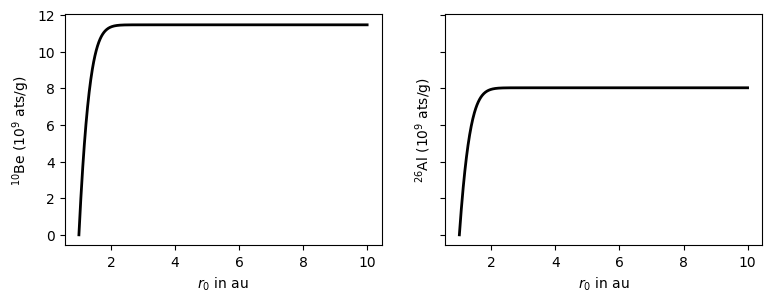

In [73]:
num = 900

r_0 = np.linspace(1.0*au, 10*au, num)
NBe_r0 = np.zeros(num) 
NAl_r0 = np.zeros(num)

for i in range(num):
    NBe_r0[i] = (PGCR_10Be / λBe) * (1 - np.exp(λBe * k * (1.0 - (r_0[i]/au)**2) * 10e6 * yr)) # 10e6 * yr
    NAl_r0[i] = (PGCR_26Al / λAl) * (1 - np.exp(λBe * k * (1.0 - (r_0[i]/au)**2) * 10e6 * yr))

####################################################################################################
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2,  figsize=(9, 3), sharey=True)

#plt.title(' ')
ax[0].plot(r_0/au, NBe_r0*1e-9, linewidth=2.0, color='black', label='GCR')
ax[1].plot(r_0/au, NAl_r0*1e-9, linewidth=2.0, color='black', label='GCR')
ax[0].set_ylabel(r'$^{10}$Be ($10^9$ ats/g)')
ax[0].set_xlabel(r'$r_0$ in au')
ax[1].set_ylabel(r'$^{26}$Al ($10^9$ ats/g)')
ax[1].set_xlabel(r'$r_0$ in au')

plt.show()